In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import tensorflow as tf


from keras.utils import plot_model

In [ ]:
data_path = r"/content/gdrive/MyDrive/self-driving-car-v2-data/balanced_data.npy"
data = np.load(data_path, allow_pickle = True)

In [ ]:
train = data[:-4000]
test = data[-4000:]

In [ ]:
X_train = np.array([i[0] for i in train]).reshape(-1,160,128,1)
Y_train = np.asarray([i[1] for i in train])

In [ ]:
X_train[0].shape

(160, 128, 1)

In [ ]:
Y_train

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

In [ ]:
X_val = np.array([i[0] for i in test]).reshape(-1,160,128,1)
Y_val = np.asarray([i[1] for i in test])

In [ ]:
inputs = keras.Input(shape = (160, 128, 1))

x = Conv2D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Flatten()(x)
#x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
#x = MaxPooling2D(pool_size = 2)(x)

#x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
#x = MaxPooling2D(pool_size = 2)(x)

outputs = Dense(4, activation = "relu")(x)

model = keras.Model(name = "CustomModelv1", inputs = inputs, outputs = outputs)

model.compile(
  loss = "categorical_crossentropy",
  optimizer = "adam",
  metrics = ["accuracy"]
  )

In [ ]:
history = model.fit(
    X_train,Y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (X_val, Y_val),
    verbose = 1
)

Epoch 1/10
623/623 [==============================] - 16s 25ms/step - loss: 6.0223 - accuracy: 0.3314 - val_loss: 5.4431 - val_accuracy: 0.3475
Epoch 2/10
623/623 [==============================] - 16s 25ms/step - loss: 5.4652 - accuracy: 0.3628 - val_loss: 5.4242 - val_accuracy: 0.3803
Epoch 3/10
623/623 [==============================] - 16s 25ms/step - loss: 5.4436 - accuracy: 0.3813 - val_loss: 5.4444 - val_accuracy: 0.3747
Epoch 4/10
623/623 [==============================] - 16s 25ms/step - loss: 5.4458 - accuracy: 0.3866 - val_loss: 5.4139 - val_accuracy: 0.3910
Epoch 5/10
623/623 [==============================] - 16s 25ms/step - loss: 5.4487 - accuracy: 0.3706 - val_loss: 5.4444 - val_accuracy: 0.3573
Epoch 6/10
623/623 [==============================] - 16s 25ms/step - loss: 5.4484 - accuracy: 0.3722 - val_loss: 5.4106 - val_accuracy: 0.3930
Epoch 7/10
623/623 [==============================] - 15s 25ms/step - loss: 5.4386 - accuracy: 0.3897 - val_loss: 5.3896 - val_accuracy:

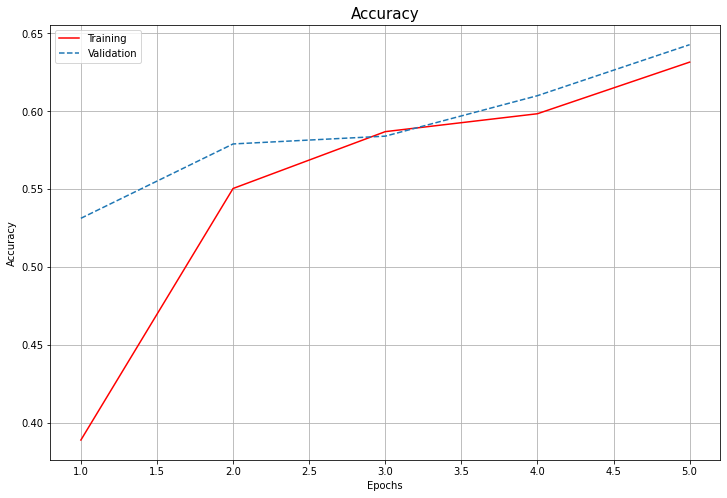

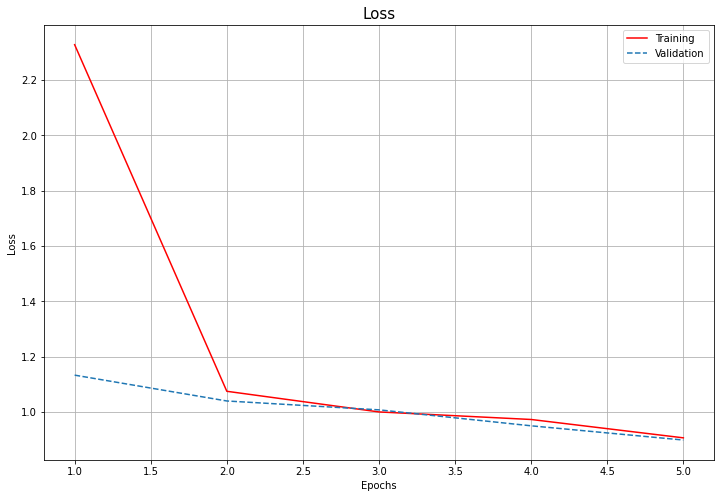

In [ ]:
get_plot(history, 5)

In [ ]:
def get_plot(trained_model,no_epochs):
    accuracy=trained_model.history['accuracy']
    loss=trained_model.history['loss']
    val_accuracy=trained_model.history['val_accuracy']
    val_loss=trained_model.history['val_loss']
    epochs=[i for i in range(1,no_epochs+1)]

    plt.figure(figsize=(12,8))
    plt.plot(epochs,accuracy,'r',label='Training')
    plt.plot(epochs,val_accuracy,'--',label='Validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy',fontsize=15)
    plt.grid()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(epochs,loss,'r',label='Training')
    plt.plot(epochs,val_loss,'--',label='Validation')
    plt.legend()
    plt.title('Loss',fontsize=15)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

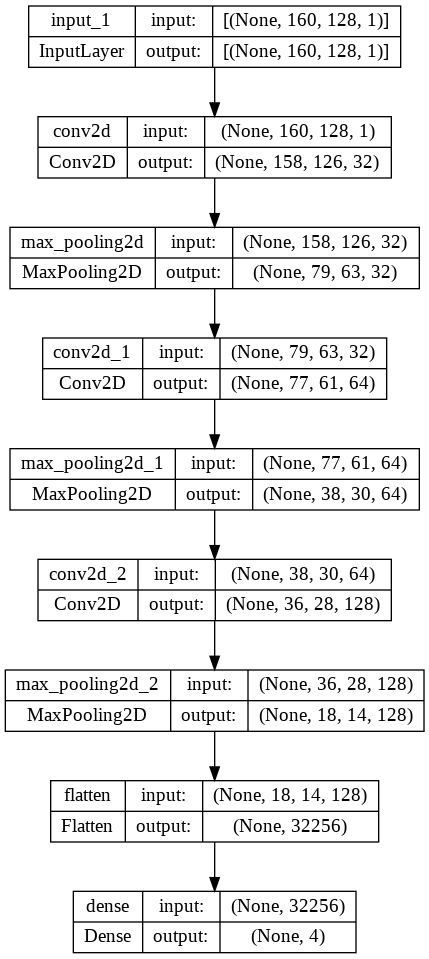

In [ ]:
plot_model(baseline_model, show_shapes=True,show_layer_names=True)

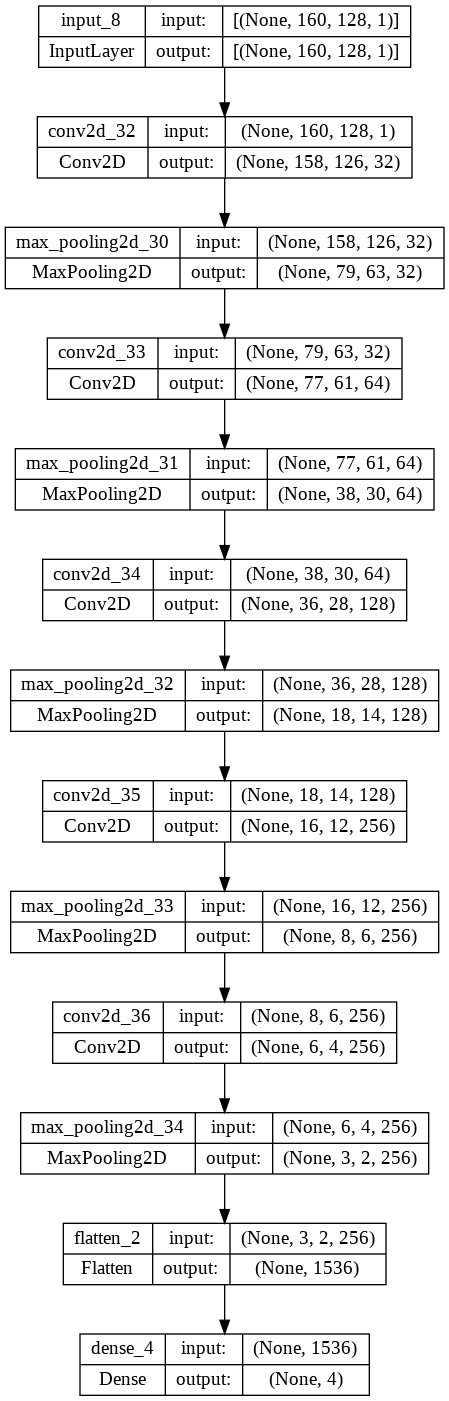

In [ ]:
plot_model(model, show_shapes = True, show_layer_names = True)

In [ ]:
# using keras tuner

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 30.5 MB/s 
     |████████████████████████████████| 1.6 MB 50.1 MB/s 


In [ ]:
import keras_tuner

In [ ]:
def BuildModel()


inputs = keras.Input(shape = (160, 128, 1))

x = Conv2D(hp.Choice('filters',[32,64,128]), kernel_size = 3, activation = "relu")(inputs)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Flatten()(x)
#x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
#x = MaxPooling2D(pool_size = 2)(x)

#x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
#x = MaxPooling2D(pool_size = 2)(x)

outputs = Dense(4, activation = "relu")(x)

second_model = keras.Model(name = "CustomModelv2", inputs = inputs, outputs = outputs)

second_model.compile(
  loss = "categorical_crossentropy",
  optimizer = "adam",
  metrics = ["accuracy"]
  )

In [ ]:
xception_base = keras.applications.xception.Xception

In [ ]:
inputs = keras.Input(shape=(160, 128, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
baseline_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
baseline_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 28, 128)       73856 

In [ ]:
baseline_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
input_shape = (160,128,1)
inputs = keras.Input(shape = (160,128,1))
xception_base = Xception(weights=None, include_top=False, input_shape = input_shape)

x = preprocess_input(inputs)
x = xception_base(x)
x = Flatten()(x)

outputs = Dense(4, activation = "softmax")(x)

xception_model = keras.Model(name = "CustomXception",inputs = inputs, outputs = outputs)



xception_model.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

xception_model.summary()


Model: "CustomXception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 160, 128, 1)]     0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 160, 128, 1)      0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 160, 128, 1)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 5, 4, 2048)        20860904  
                                                                 
 flatten_4 (Flatten)         (None, 40960)             0         
                                                                 
 dense_4 (Dense)             (None, 4)              

In [ ]:
checkpoint_filepath = '/content/checkpoint/'

checkpoint = keras.callbacks.ModelCheckpoint('/content/checkpoint/model1{epoch:08d}.h5', period=5) 
'''
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
'''
#es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=5)

"\nmodel_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(\n    filepath=checkpoint_filepath,\n    save_weights_only=True,\n    monitor='val_accuracy',\n    mode='max',\n    save_best_only=True)\n"

In [ ]:
history_xception = xception_model.fit(
    X_train,Y_train,
    epochs = 12,
    batch_size = 32,
    validation_data = (X_val, Y_val),
    verbose = 1,
    callbacks=[checkpoint]
)

Epoch 1/25
623/623 [==============================] - 161s 251ms/step - loss: 0.9835 - accuracy: 0.6343 - val_loss: 1.0488 - val_accuracy: 0.6430
Epoch 2/25
623/623 [==============================] - 159s 256ms/step - loss: 0.6191 - accuracy: 0.7700 - val_loss: 0.7298 - val_accuracy: 0.7380
Epoch 3/25
623/623 [==============================] - 155s 249ms/step - loss: 0.4209 - accuracy: 0.8485 - val_loss: 0.5429 - val_accuracy: 0.8380
Epoch 4/25
623/623 [==============================] - 155s 249ms/step - loss: 0.3149 - accuracy: 0.8883 - val_loss: 0.5553 - val_accuracy: 0.8185
Epoch 5/25
623/623 [==============================] - 156s 251ms/step - loss: 0.2324 - accuracy: 0.9208 - val_loss: 0.5033 - val_accuracy: 0.8558
Epoch 6/25
623/623 [==============================] - 155s 250ms/step - loss: 0.1679 - accuracy: 0.9421 - val_loss: 0.5492 - val_accuracy: 0.8595
Epoch 7/25
623/623 [==============================] - 159s 255ms/step - loss: 0.1480 - accuracy: 0.9515 - val_loss: 0.4963 -

KeyboardInterrupt: ignored

In [ ]:
loss, acc = xception_model.evaluate(X_val, Y_val, verbose=2)
print(f"Loss : {loss}\nAccuracy : {acc}")

125/125 - 6s - loss: 0.5072 - accuracy: 0.8855 - 6s/epoch - 50ms/step
Loss : 0.5072224140167236
Accuracy : 0.8855000138282776


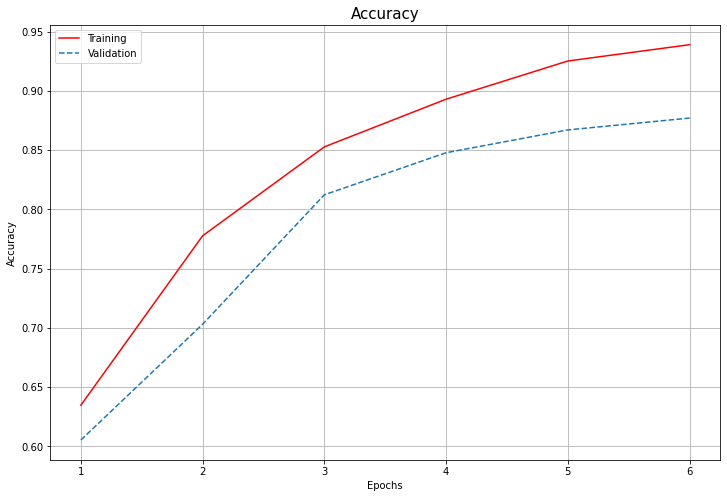

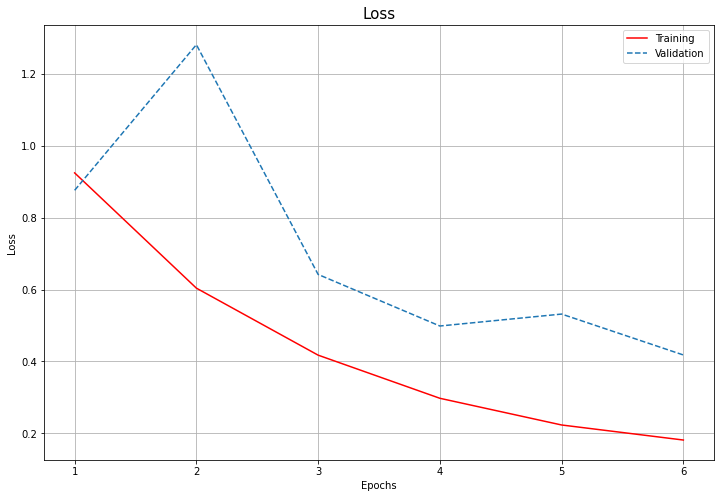

In [ ]:
get_plot(history_xception, 6)